In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.3.0'

# Data Preprocessing

### Preprocessing training set

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('drive/My Drive/dog or cat dataset/dataset/Part 2 - Convolutional Neural Networks/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/dog or cat dataset/dataset/Part 2 - Convolutional Neural Networks/dataset/test_set',
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary', 
                                            seed = 0)

Found 2000 images belonging to 2 classes.


In [ ]:
test_set[0][1]

array([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

# Building CNN

## adding layers

In [ ]:
cnn = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]),
                                  tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
                                  tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
                                  tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(units=128, activation='relu'),
                                  tf.keras.layers.Dropout(0.5),
                                  tf.keras.layers.Dense(units=64, activation='relu'),
                                  tf.keras.layers.Dense(units=10, activation='sigmoid')])

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
dropout (Dropout)            (None, 128)              

## compiling the model

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 45s 179ms/step - loss: 0.6666 - accuracy: 0.5884 - val_loss: 0.7075 - val_accuracy: 0.5790
Epoch 2/25
250/250 [==============================] - 45s 181ms/step - loss: 0.6041 - accuracy: 0.6761 - val_loss: 0.5721 - val_accuracy: 0.7155
Epoch 3/25
250/250 [==============================] - 46s 182ms/step - loss: 0.5748 - accuracy: 0.7041 - val_loss: 0.5657 - val_accuracy: 0.7085
Epoch 4/25
250/250 [==============================] - 45s 181ms/step - loss: 0.5422 - accuracy: 0.7230 - val_loss: 0.5287 - val_accuracy: 0.7395
Epoch 5/25
250/250 [==============================] - 45s 180ms/step - loss: 0.5320 - accuracy: 0.7364 - val_loss: 0.5113 - val_accuracy: 0.7500
Epoch 6/25
250/250 [==============================] - 47s 188ms/step - loss: 0.5077 - accuracy: 0.7501 - val_loss: 0.5088 - val_accuracy: 0.7520
Epoch 7/25
250/250 [==============================] - 46s 185ms/step - loss: 0.4921 - accuracy: 0.7619 - val_loss: 0.4733 - val_ac

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 47s 189ms/step - loss: 0.3295 - accuracy: 0.8539 - val_loss: 0.4553 - val_accuracy: 0.8035
Epoch 2/25
250/250 [==============================] - 44s 176ms/step - loss: 0.3196 - accuracy: 0.8612 - val_loss: 0.4234 - val_accuracy: 0.8110
Epoch 3/25
250/250 [==============================] - 44s 176ms/step - loss: 0.3137 - accuracy: 0.8600 - val_loss: 0.4329 - val_accuracy: 0.8085
Epoch 4/25
250/250 [==============================] - 44s 174ms/step - loss: 0.3012 - accuracy: 0.8686 - val_loss: 0.4274 - val_accuracy: 0.8110
Epoch 5/25
250/250 [==============================] - 44s 175ms/step - loss: 0.3085 - accuracy: 0.8651 - val_loss: 0.4449 - val_accuracy: 0.8030
Epoch 6/25
250/250 [==============================] - 44s 175ms/step - loss: 0.2998 - accuracy: 0.8675 - val_loss: 0.4248 - val_accuracy: 0.8085
Epoch 7/25
250/250 [==============================] - 45s 179ms/step - loss: 0.3038 - accuracy: 0.8680 - val_loss: 0.4785 - val_ac

In [ ]:
p = cnn.predict(test_set)

In [ ]:
p[0][0]

0.0042322828

In [ ]:
pr = []
for i in range (len(p)):
  if p[i][0] > 0.5:
    pr.append(1)
  else:
    pr.append(0)

In [ ]:
len(tr)

2000

In [ ]:
h = cnn.history.history

In [ ]:
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
train_acc = h["accuracy"]
val_acc = h["val_accuracy"]
train_loss = h["loss"]
val_loss = h["val_loss"]

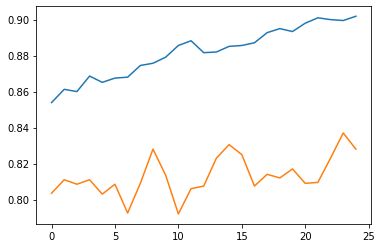

In [ ]:
plt.plot(train_acc)
plt.plot(val_acc)

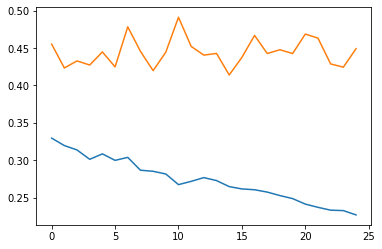

In [ ]:
plt.plot(train_loss)
plt.plot(val_loss)

In [ ]:
cnn.save("/content/drive/My Drive/dog or cat dataset/dataset/Part 2 - Convolutional Neural Networks/model/2conv 2ann 1dropout layer model.h5")

In [ ]:
cnn = tf.keras.models.load_model("/content/drive/My Drive/dog or cat dataset/dataset/Part 2 - Convolutional Neural Networks/model/2conv 2ann 1dropout layer model.h5")

# Making single predictions

In [ ]:
from matplotlib.pylab import imshow

In [ ]:
import numpy as np
from keras.preprocessing import image

In [ ]:
cnn.predict(test_set)

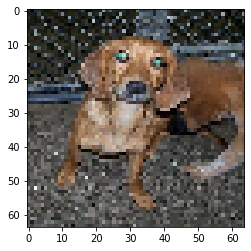

In [ ]:
imshow(test_set[0][0][5])

In [ ]:
def single_preds(path):
  test_image = image.load_img(path, target_size = (64, 64))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = cnn.predict(test_image)
  training_set.class_indices
  print(result)
  if result[0][0] > 0.5:
      prediction = 'dog'
  else:
      prediction = 'cat'
  print(prediction)

In [ ]:
single_preds("/content/drive/My Drive/dog or cat dataset/dataset/Part 2 - Convolutional Neural Networks/dataset/single_prediction/low-res-horse.jpg")

[[1.]]
dog


In [ ]:
len(test_set)

63

# viewing test preds and images

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
test_set[0][1]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.],
      dtype=float32)

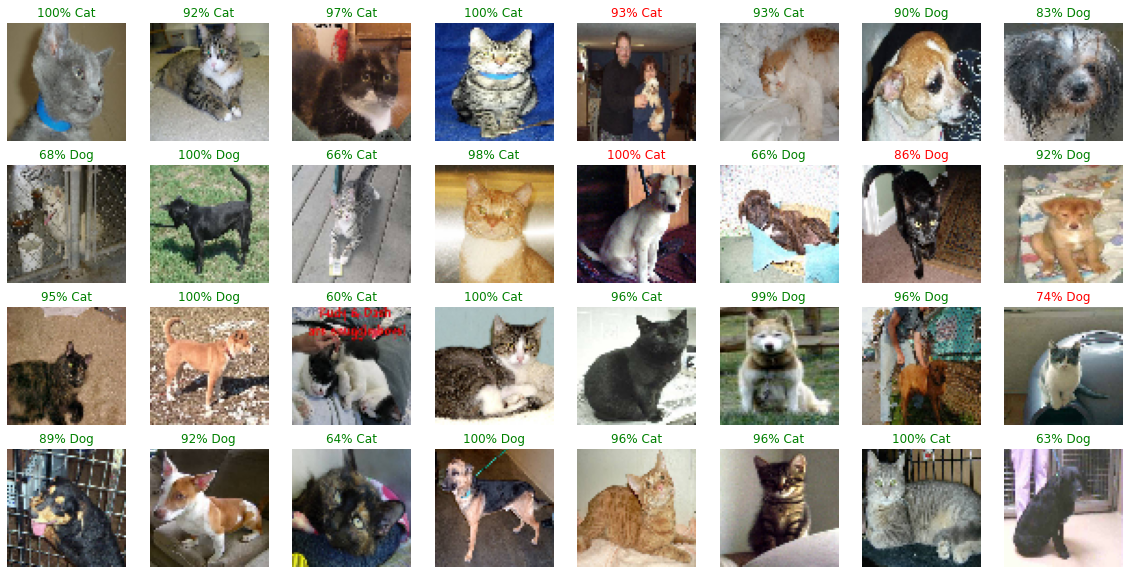

In [ ]:
plt.figure(figsize = (20,10))
j = 42
for i in range (0 , 32):
  plt.subplot(4,8,i+1 )
  plt.imshow(test_set[j][0][i])
  preds = cnn.predict(np.expand_dims(test_set[j][0][i] , axis= 0))
  if preds > 0.5 :
    name =f"{preds[0][0]*100 :2.0f}"+ "% Dog"
    pred_label = 1
  else:
    name =f"{(1-preds[0][0])*100 :2.0f}"+ "% Cat"
    pred_label =  0
  if pred_label == test_set[j][1][i]:
    color = "green"
  else:
    color = "red"
  plt.title(name , color = color)
  plt.axis("off")